# Context : -
Human beings communicate with each other in the form of speech, gestures and emotions. As such, systems that can recognize the same are in great demand in many fields that aim to automate these visual and audio cues to communication. With respect to artificial intelligence, a computer will be able to interact with humans much more naturally if they are capable of understanding human emotion. Such a system would also be of great help in counseling and other healthcare related fields. In an E-Learning system for example, the presentation style may even be varied depending on the student's emotional state. **The scope of applications for automatic facial emotion recognition is endless**.

However in many cases, static emotion detection alone, is not very useful all by itself. It is essential to be aware of the user's feelings over a period of time in a live environment.


### Problem Statement -
Detecting the Facial Emotion using different Machine Learning and Deep learning models.



### DATASET: -
The name of the data set is fer2013 which is an open-source data set that was made publicly available for a Kaggle competition. It contains 48x48 pixel grayscale facial images and it is not full fledged data. A part of the dataset is taken to get better understanding and inference of CNN's.


The original dataset has been modified such that there are only two emotion categories (0-Happy, 1=Not Happy) present in the current data.


In [1]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/Machine Learning/Data

Mounted at /gdrive
/gdrive/My Drive/Machine Learning/Data


In [2]:
!unzip 'Emotions Detection.zip'[y]

unzip:  cannot find or open Emotions Detection.zip[y], Emotions Detection.zip[y].zip or Emotions Detection.zip[y].ZIP.

No zipfiles found.


In [3]:
import os
import cv2
import numpy as np
import pandas as pd

# Functions to read and process images
def preprocess_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # Read image in grayscale
  img_resized = cv2.resize(img, (48,48)) # read the image to 48x48 Pixels
  img_flattened = img_resized.flatten() # Flatten the image into 1D array
  return img_flattened

# Functions to Convert Image to CSV
def images_to_csv(folder_path, csv_filename):
  data = []
  labels = []
  for label, class_folder in enumerate(sorted(os.listdir(folder_path))):
    class_folder_path = os.path.join(folder_path, class_folder)
    if os.path.isdir(class_folder_path):
      for image_file in os.listdir(class_folder_path):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
          image_path = os.path.join(class_folder_path, image_file)
          img_data = preprocess_image(image_path)
          data.append(img_data)
          labels.append(label)

  data = np.array(data)
  labels = np.array(labels)
  num_pixels = data.shape[1] # Number of pixels in each image
  column_names = [str(i) for i in range(1, num_pixels + 1)] # Column names for pixel Positions

  df_data = pd.DataFrame(data, columns=column_names)
  df_labels = pd.DataFrame({'label':labels})

  df = pd.concat([df_data, df_labels], axis=1)

  df.to_csv(csv_filename, index=False)


# Paths to train and Test Folders
train_folder = "/gdrive/My Drive/Machine Learning/Data/Emotions Detection/Train"
test_folder = "/gdrive/My Drive/Machine Learning/Data/Emotions Detection/Test"

# Convert Image to csv
train_csv_filename = 'train_data.csv'
images_to_csv(train_folder, train_csv_filename)

# Convert Test Images to csv
test_csv_filename = 'test_data.csv'
images_to_csv(test_folder, test_csv_filename)

print("Conversion completed successfully.")

Conversion completed successfully.


In [4]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [5]:
train_data

,1,2,3,4,5,6,7,8,9,10,...,2296,2297,2298,2299,2300,2301,2302,2303,2304,label
0,47,30,42,39,51,45,49,40,53,62,...,32,40,44,52,56,82,61,58,53,0
1,35,39,54,50,46,49,87,122,117,106,...,102,81,75,71,59,50,66,77,90,0
2,66,77,51,34,48,57,44,62,61,53,...,255,255,255,255,255,255,255,255,255,0
3,9,10,21,30,48,78,93,44,37,55,...,13,18,19,21,18,15,16,15,12,0
4,103,90,93,86,91,96,109,115,118,123,...,74,71,74,78,85,82,69,90,150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,3,6,14,27,75,144,155,167,173,169,...,6,4,2,3,5,4,3,3,2,1
4018,124,82,26,13,8,15,46,91,122,130,...,180,192,136,75,76,66,82,106,117,1
4019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4020,211,215,220,221,219,216,213,210,207,205,...,170,168,162,170,169,160,159,156,152,1


In [6]:
test_data

,1,2,3,4,5,6,7,8,9,10,...,2296,2297,2298,2299,2300,2301,2302,2303,2304,label
0,89,82,82,75,70,77,69,83,84,79,...,182,182,181,180,181,179,179,183,179,0
1,35,34,31,29,29,32,34,35,37,37,...,120,112,105,36,1,6,0,7,7,0
2,22,18,31,38,47,39,18,28,58,81,...,87,49,30,18,10,7,3,31,21,0
3,209,208,202,202,201,230,223,158,113,108,...,79,109,173,233,253,254,222,34,3,0
4,200,182,189,216,226,226,228,228,229,231,...,205,199,195,190,190,191,176,224,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,88,90,87,86,94,77,71,62,58,67,...,98,103,60,59,74,90,103,110,116,1
420,142,134,87,40,50,48,48,38,38,42,...,60,83,97,104,127,121,101,123,138,1
421,24,28,16,16,13,36,69,99,98,109,...,96,51,104,31,11,16,9,20,20,1
422,63,64,65,73,116,172,172,152,154,185,...,40,42,43,40,45,56,44,39,41,1


label
1    2022
0    2000
Name: count, dtype: int64


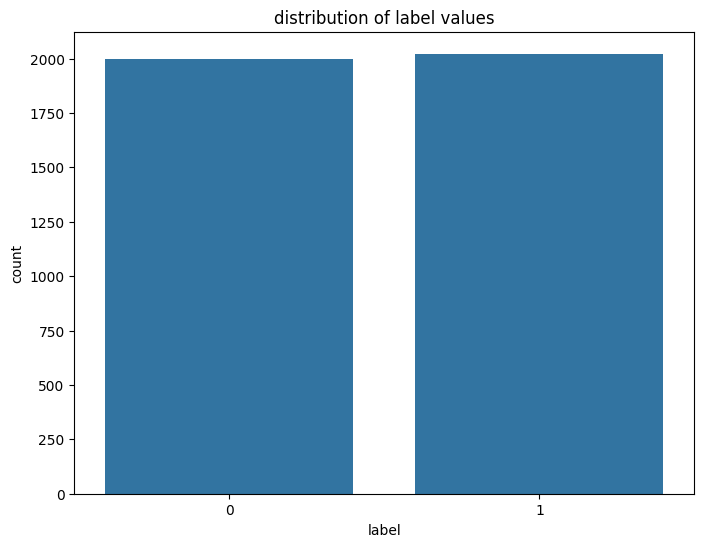

In [7]:
# checking distribution of label
import matplotlib.pyplot as plt
import seaborn as sns
y = train_data['label']
print(y.value_counts())

#plot the label values in a complaint
plt.figure(figsize=(8,6))
sns.countplot(x='label',data=train_data)
plt.title('distribution of label values')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

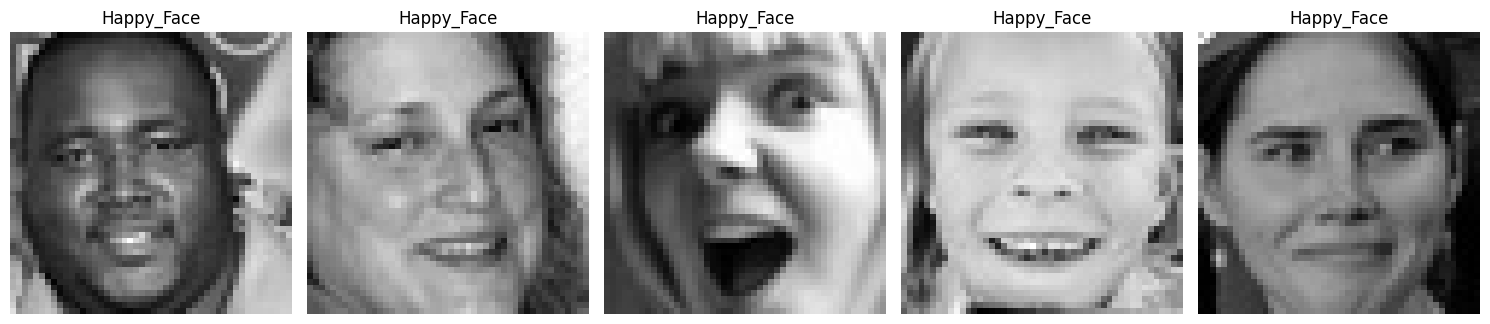

In [8]:
import random

# Define labels
happy_label = 0 # Assuming 0 Represents Happy faces

# Filter data based on labels
happy_faces = train_data[train_data['label']== happy_label]

# Checl if there are enough happy face samples
if len(happy_faces) >=5:
  # randomly select happy face images
  random_happy_samples = happy_faces.sample(5)


  # plot the happy face images
  plt.figure(figsize=(15,16))
  for i, (_, row) in enumerate(random_happy_samples.iterrows(), 1):
    img_data = row.values[:-1] # Exclude the label column
    img_data = np.array(img_data, dtype='uint8').reshape((48,48)) # reshape the 48x48 image
    plt.subplot(1,5,i)
    plt.imshow(img_data, cmap='gray')
    plt.title('Happy_Face')
    plt.axis('off')

  plt.tight_layout()
  plt.show
else:
  print("Not enough Happy face sample avaiable to display")

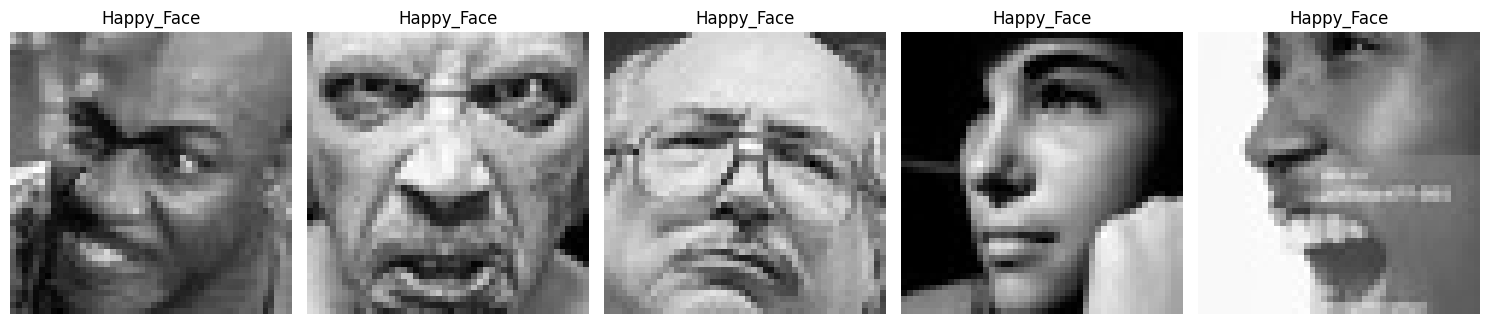

In [9]:
import random

# Define labels
unhappy_label = 1 # Assuming 1 Represents Happy faces

# Filter data based on labels
unhappy_faces = train_data[train_data['label']== unhappy_label]

# Checl if there are enough happy face samples
if len(unhappy_faces) >=5:
  # randomly select unhappy face images
  random_unhappy_samples = unhappy_faces.sample(5)


  # plot the unhappy face images
  plt.figure(figsize=(15,16))
  for i, (_, row) in enumerate(random_unhappy_samples.iterrows(), 1):
    img_data = row.values[:-1] # Exclude the label column
    img_data = np.array(img_data, dtype='uint8').reshape((48,48)) # reshape the 48x48 image
    plt.subplot(1,5,i)
    plt.imshow(img_data, cmap='gray')
    plt.title('Happy_Face')
    plt.axis('off')

  plt.tight_layout()
  plt.show
else:
  print("Not enough unHappy face sample avaiable to display")

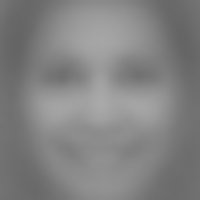

In [10]:
from google.colab.patches import cv2_imshow
import cv2

#Load your CSV file containing the training data
train_data = pd.read_csv('train_data.csv')

#define label
happy_label = 0 # assuming 0 represents happy faces

#filter data based on labels to select only happy faces
happy_faces = train_data[train_data['label'] == happy_label]

#check if there are happy face samples available
if len(happy_faces) > 0 :
  #extract pixel values of happy face images
  happy_images = happy_faces.iloc[:, :-1].values

  # compute the mean image
  mean_image = np.mean(happy_images, axis=0)

  #reshape mean image to 48x48
  mean_image = mean_image.reshape( (48, 48)).astype('uint8')

  #resize the mean image to display it larger
  mean_image_large = cv2.resize(mean_image,(200,200))

  #display the mean image
  cv2_imshow(mean_image_large)
else:
  print("no happy face samples available")

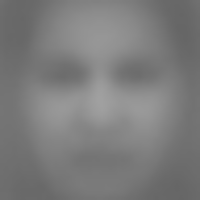

In [11]:
from google.colab.patches import cv2_imshow
import cv2

#Load your CSV file containing the training data
train_data = pd.read_csv('train_data.csv')

#define label
non_happy_label = 1 # assuming 1 represents non-happy faces

#filter data based on labels to select only non-happy faces
non_happy_faces = train_data[train_data['label'] == non_happy_label]

#check if there are non_happy face samples available
if len(non_happy_faces) > 0 :
  #extract pixel values of non_happy face images
  non_happy_images = non_happy_faces.iloc[:, :-1].values

  # compute the mean image
  mean_image = np.mean(non_happy_images, axis=0)

  #reshape mean image to 48x48
  mean_image = mean_image.reshape((48,48)).astype('uint8')

  #resize the mean image to display it larger
  mean_image_large = cv2.resize(mean_image,(200,200))

  #display the mean image
  cv2_imshow(mean_image_large)
else:
  print("no non_happy face samples available")

In [12]:
X_train = train_data.drop('label',axis=1)
y_train = train_data['label']

X_test = test_data.drop('label',axis=1)
y_test = test_data['label']


In [13]:

X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
X_train.shape

(4022, 2304)

In [15]:
X_test.shape

(424, 2304)

### ANN MODEL

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Rehsape input data to match the expected input shape of the model
X_train = X_train.reshape(-1,48,48,1) # Reshape for convolutional input
X_test = X_test.reshape(-1,48,48,1)   # Reshape for convolutional input

# Define the ANN Model
model = Sequential([
    Flatten(input_shape=(48,48,1)),        # Flatten the input image
    Dense(128, activation="relu"),         # Hidden layer with 128 neurons and ReLu Activation
    Dense(1,activation='sigmoid')          # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),    # Adam Optimzier
              loss="binary_crossentropy",            # Binary cross entrophy loss fucntion
              metrics=['accuracy'])                   # Accuracy Metrics

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test_accuracy", test_acc)

Epoch 1/20
101/101 [==============================] - 2s 8ms/step - loss: 0.6638 - accuracy: 0.6264 - val_loss: 1.4652 - val_accuracy: 0.0385
Epoch 2/20
101/101 [==============================] - 1s 6ms/step - loss: 0.6216 - accuracy: 0.6658 - val_loss: 0.9424 - val_accuracy: 0.2758
Epoch 3/20
101/101 [==============================] - 1s 6ms/step - loss: 0.6031 - accuracy: 0.6832 - val_loss: 0.8538 - val_accuracy: 0.3814
Epoch 4/20
101/101 [==============================] - 1s 6ms/step - loss: 0.5779 - accuracy: 0.7013 - val_loss: 1.0767 - val_accuracy: 0.2422
Epoch 5/20
101/101 [==============================] - 1s 6ms/step - loss: 0.5783 - accuracy: 0.6963 - val_loss: 0.5477 - val_accuracy: 0.7702
Epoch 6/20
101/101 [==============================] - 1s 6ms/step - loss: 0.5722 - accuracy: 0.7087 - val_loss: 0.8839 - val_accuracy: 0.4000
Epoch 7/20
101/101 [==============================] - 1s 6ms/step - loss: 0.5605 - accuracy: 0.7103 - val_loss: 1.5493 - val_accuracy: 0.0882
Epoch 

# CNN

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


# Load your csv file containing the data
data = pd.read_csv('train_data.csv')

# Split the data into features (X) and labels (Y)
X = data.drop('label',axis=1).values
y = data["label"].values

# Normalize the pixel values (0-255) toa range of 0 to 1
X = X/255.0

# Reshape the input data to macth the expected input shape of the model
X = X.reshape(-1,48,48,1) # Reshape for convolutional input

# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Define the CNN Model

model = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3),padding='same',activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')

])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print("Test Accuracy",test_acc)

Epoch 1/20
81/81 [==============================] - 12s 136ms/step - loss: 0.6953 - accuracy: 0.5391 - val_loss: 0.6877 - val_accuracy: 0.6056
Epoch 2/20
81/81 [==============================] - 10s 124ms/step - loss: 0.6759 - accuracy: 0.5729 - val_loss: 0.6716 - val_accuracy: 0.6227
Epoch 3/20
81/81 [==============================] - 11s 137ms/step - loss: 0.6482 - accuracy: 0.6354 - val_loss: 0.6667 - val_accuracy: 0.5916
Epoch 4/20
81/81 [==============================] - 12s 144ms/step - loss: 0.6202 - accuracy: 0.6630 - val_loss: 0.5942 - val_accuracy: 0.6925
Epoch 5/20
81/81 [==============================] - 9s 115ms/step - loss: 0.5817 - accuracy: 0.6992 - val_loss: 0.5682 - val_accuracy: 0.7189
Epoch 6/20
81/81 [==============================] - 11s 134ms/step - loss: 0.5518 - accuracy: 0.7244 - val_loss: 0.5555 - val_accuracy: 0.7127
Epoch 7/20
81/81 [==============================] - 12s 144ms/step - loss: 0.5271 - accuracy: 0.7482 - val_loss: 0.5210 - val_accuracy: 0.7407
